# Sampling at Different Timepoints

In [1]:
# Import modules
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

from scipy import stats

from turtles.turtles_utils import *

## Load Data and Get Length Distributions

In [2]:
#: Overall directory for TdT project data and analysis
tdt_dir = 'C:/Users/jonst/Box Sync/All_dNTP_data/'

#: Subdirectory for NGS run
data_dir = tdt_dir + 'Data_and_Results/All_Data_Filtered_Trimmed/Marija_Sampling_Timepoints_Mg/'

#: Filename prefixes for 0 control conditions
zero_control_conds = ['120min_1-253681468',
                      '120min_2-253678458',
                      '120min_3-253693451']

#: suffix of R1 fastq file to read in each directory
filename_end = 'trimmed.fq'

#: Directory to save generated figures in - it gets created if not present already
figure_dir = tdt_dir + 'Data_and_Results/Magnesium_Timepoint_Sampling/Marija_run1/'
os.makedirs(os.path.dirname(figure_dir), exist_ok=True)

In [3]:
seqs_dict = read_seqs(data_dir, filename_end=filename_end, cutoff=0.0, degen=5,
                      cond_text=['min_', 'sec_'])

Loading 10min_2-253677475
Read 98486 sequences...

Loading 10min_3-253686469
Read 87535 sequences...

Loading 120min_1-253681468
Read 84131 sequences...

Loading 120min_2-253678458
Read 126073 sequences...

Loading 120min_3-253693451
Read 86493 sequences...

Loading 1min_1-253686470
Read 60474 sequences...

Loading 1min_2-253679455
Read 66054 sequences...

Loading 1min_3-253679456
Read 66910 sequences...

Loading 20min_1-253676456
Read 69579 sequences...

Loading 20min_2-253693452
Read 63689 sequences...

Loading 20min_3-253685468
Read 84549 sequences...

Loading 2min_1-253677478
Read 54726 sequences...

Loading 2min_2-253688464
Read 90689 sequences...

Loading 2min_3-253678459
Read 64685 sequences...

Loading 30min_1-253682459
Read 92470 sequences...

Loading 30min_2-253676457
Read 90315 sequences...

Loading 30min_3-253687471
Read 82679 sequences...

Loading 30_sec_1-253681469
Read 108320 sequences...

Loading 30_sec_2-253692453
Read 78220 sequences...

Loading 30_sec_3-253692454
Rea

In [4]:
lens_dict = get_length_dists(seqs_dict)

## Choose Legend Labels for Plotting
### Condition Labels

In [5]:
condition_dict = {}
conditions = seqs_dict.keys()
for condition in conditions:
    if '30_sec' in condition:
        condition_dict[condition] = '30 sec'
    elif '1min' in condition:
        condition_dict[condition] = '1 min'
    elif '2min' in condition:
        condition_dict[condition] = '2 min'
    elif '3min' in condition:
        condition_dict[condition] = '3 min'
    elif '4min' in condition:
        condition_dict[condition] = '4 min'
    elif '5min' in condition:
        condition_dict[condition] = '5 min'
    elif '10min' in condition:
        condition_dict[condition] = '10 min'
    elif '120min' in condition:
        condition_dict[condition] = '120 min'
    elif '20min' in condition:
        condition_dict[condition] = '20 min'
    elif '30min' in condition:
        condition_dict[condition] = '30 min'
    elif '45min' in condition:
        condition_dict[condition] = '45 min'
    elif '60min' in condition:
        condition_dict[condition] = '60 min'
    elif '90min' in condition:
        condition_dict[condition] = '90 min'
    elif 'NoTdT' in condition:
        condition_dict[condition] = 'No TdT'
    else:
        print('Error: {} not recognized.'.format(condition))

### Replicate Labels

In [6]:
rep_dict = {}
for condition in conditions:
    rep_dict[condition] = condition[-11]

### Convert Data into Long-Form pandas DataFrame for Plotting


In [7]:
averages = parse_fastq_lengths(lens_dict, expt_time=120)
averages = averages.drop('Rate (nt/min)', axis=1)

# Extract times from directory names
time_col = []
for directory in averages['Directory']:
    time = re.search('^[0-9]+', directory).group(0)
    
    if '30_sec' in directory:
        time = 0.50  # All times in directory names are in minutes, except for one
    
    time_col.append(float(time))

averages['Time'] = time_col
    
averages

,Directory,Mean,Std Devs,Time
0,10min_2-253677475,7.407297,6.265152,10.0
1,10min_3-253686469,7.433354,6.198489,10.0
2,120min_1-253681468,25.512463,14.549815,120.0
3,120min_2-253678458,25.678277,14.658013,120.0
4,120min_3-253693451,22.965357,12.698077,120.0
5,1min_1-253686470,7.745518,10.533216,1.0
6,1min_2-253679455,5.904032,7.370928,1.0
7,1min_3-253679456,5.624682,7.767377,1.0
8,20min_1-253676456,8.144656,6.631682,20.0
9,20min_2-253693452,8.569302,6.620839,20.0


## Regress Length vs Time and Plot

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(averages.Time, averages.Mean)

In [9]:
sns.set(style='white', font='times-new-roman', font_scale=2, rc={'lines.linewidth': 5})
mpl.rc('font',family='Times New Roman')

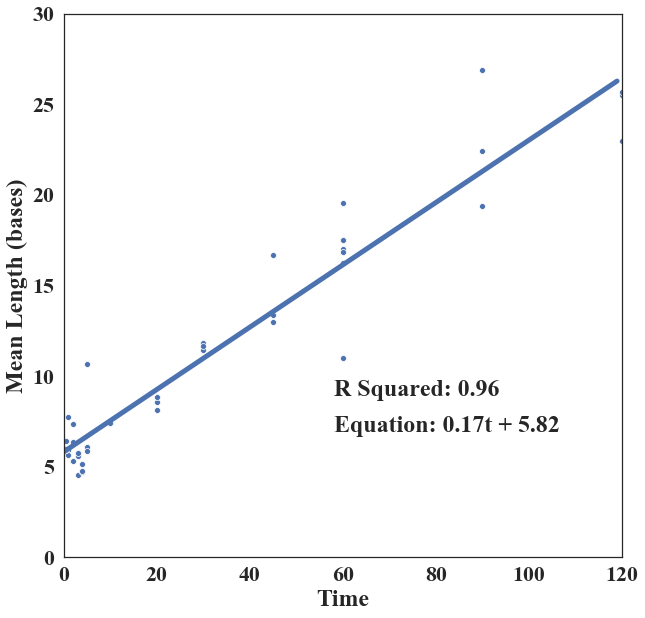

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

sns.scatterplot(x='Time', y='Mean', data=averages, ax=ax)

x = range(120)
y = slope * x + intercept
sns.lineplot(x, y, ax=ax)

ax.set_ylim(0, 30)
ax.set_xlim(0,120)
ax.set_ylabel('Time (min)')
ax.set_ylabel('Mean Length (bases)')

fig.text(0.5, 0.35, s='R Squared: {}'.format(round(r_value, 2)))
fig.text(0.5, 0.30, s='Equation: {}t + {}'.format((round(slope, 2)), round(intercept, 2)))

fig.savefig(figure_dir + 'Length_over_Time')
plt.show()

In [11]:
averages.to_csv(figure_dir + 'mean_lengths.csv')

In [24]:
lens = lens_dict['30_sec_1-253681469']
lens

[9083,
 12578,
 15587,
 14412,
 10665,
 8776,
 5921,
 4786,
 3654,
 2801,
 2351,
 1895,
 1611,
 1414,
 1120,
 1036,
 854,
 747,
 686,
 660,
 577,
 496,
 508,
 466,
 450,
 407,
 358,
 362,
 304,
 311,
 297,
 257,
 236,
 201,
 177,
 175,
 135,
 120,
 130,
 110,
 105,
 87,
 86,
 91,
 66,
 68,
 67,
 71,
 56,
 46,
 43,
 45,
 38,
 34,
 42,
 26,
 29,
 21,
 26,
 33,
 21,
 19,
 13,
 20,
 17,
 18,
 12,
 11,
 5,
 10,
 9,
 10,
 6,
 10,
 6,
 9,
 6,
 5,
 3,
 4,
 4,
 1,
 3,
 2,
 1,
 1,
 2,
 5,
 2,
 1,
 0,
 1,
 1,
 3,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [28]:
lens_enum = [i for i in range(len(lens)) for _ in range(lens[i]) ]

In [32]:
np.median(lens_enum)

4.0

In [33]:
np.mean(lens_enum)

6.416748421968421

In [48]:
conditions = lens_dict.keys()
conditions = list(conditions)
conditions

['10min_2-253677475',
 '10min_3-253686469',
 '120min_1-253681468',
 '120min_2-253678458',
 '120min_3-253693451',
 '1min_1-253686470',
 '1min_2-253679455',
 '1min_3-253679456',
 '20min_1-253676456',
 '20min_2-253693452',
 '20min_3-253685468',
 '2min_1-253677478',
 '2min_2-253688464',
 '2min_3-253678459',
 '30min_1-253682459',
 '30min_2-253676457',
 '30min_3-253687471',
 '30_sec_1-253681469',
 '30_sec_2-253692453',
 '30_sec_3-253692454',
 '3min_1-253690459',
 '3min_2-253690460',
 '3min_3-253680473',
 '45min_1-253689466',
 '45min_2-253690461',
 '45min_3-253692455',
 '4min_1-253687472',
 '4min_2-253676458',
 '4min_3-253689467',
 '5min_1-253686471',
 '5min_2-253691457',
 '5min_3-253693454',
 '60min_1-253684476',
 '60min_2-253678461',
 '60min_3-253691458',
 '60min_4-253679457',
 '60min_5-253693455',
 '60min_6-253690462',
 '90min_1-253687473',
 '90min_2-253689468',
 '90min_3-253681470']

In [53]:
sorted_conds = []
for time in ['30_sec', '1min', '2min', '3min', '4min', '5min', '10min', '20min', '30min', '45min',
             '60min', '90min', '120min']:
    for condition in conditions:
        if condition.startswith(time):
            sorted_conds.append(condition)

In [54]:
sorted_conds

['30_sec_1-253681469',
 '30_sec_2-253692453',
 '30_sec_3-253692454',
 '1min_1-253686470',
 '1min_2-253679455',
 '1min_3-253679456',
 '2min_1-253677478',
 '2min_2-253688464',
 '2min_3-253678459',
 '3min_1-253690459',
 '3min_2-253690460',
 '3min_3-253680473',
 '4min_1-253687472',
 '4min_2-253676458',
 '4min_3-253689467',
 '5min_1-253686471',
 '5min_2-253691457',
 '5min_3-253693454',
 '10min_2-253677475',
 '10min_3-253686469',
 '20min_1-253676456',
 '20min_2-253693452',
 '20min_3-253685468',
 '30min_1-253682459',
 '30min_2-253676457',
 '30min_3-253687471',
 '45min_1-253689466',
 '45min_2-253690461',
 '45min_3-253692455',
 '60min_1-253684476',
 '60min_2-253678461',
 '60min_3-253691458',
 '60min_4-253679457',
 '60min_5-253693455',
 '60min_6-253690462',
 '90min_1-253687473',
 '90min_2-253689468',
 '90min_3-253681470',
 '120min_1-253681468',
 '120min_2-253678458',
 '120min_3-253693451']

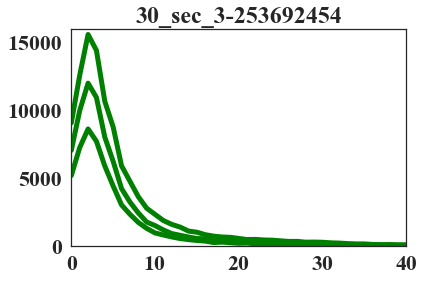

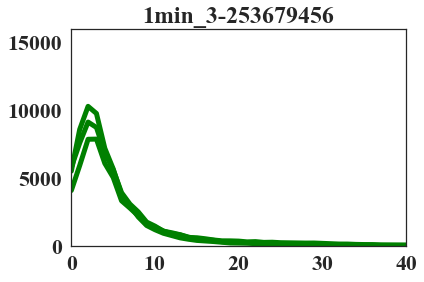

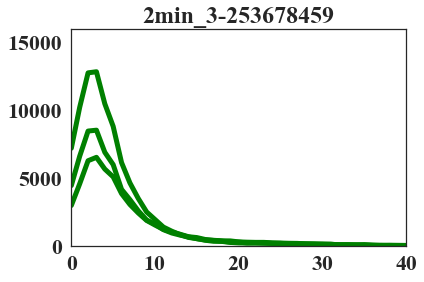

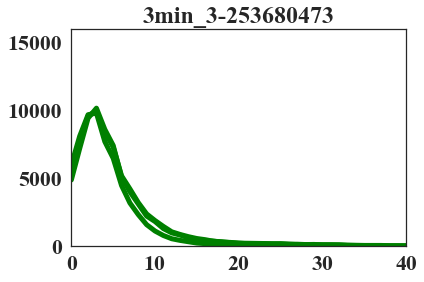

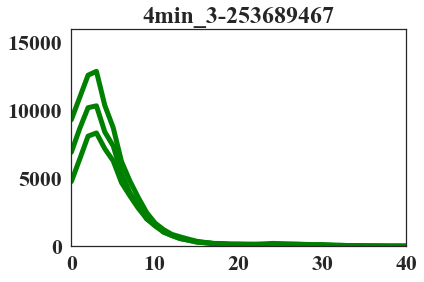

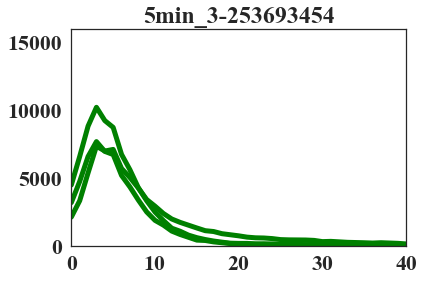

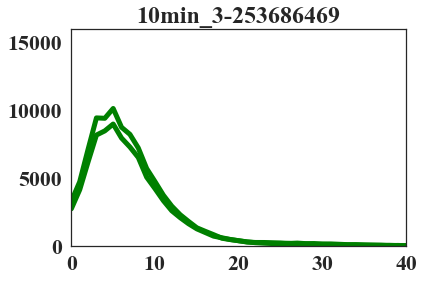

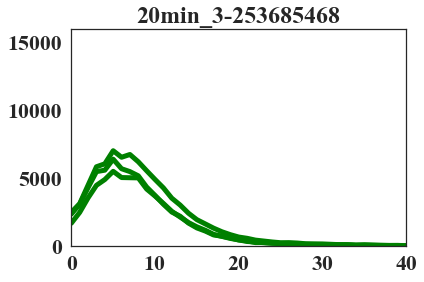

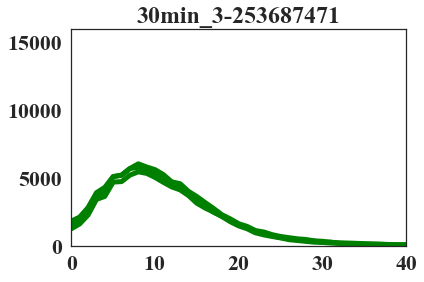

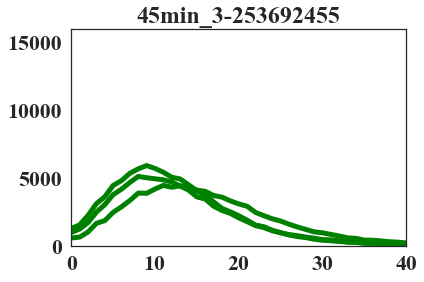

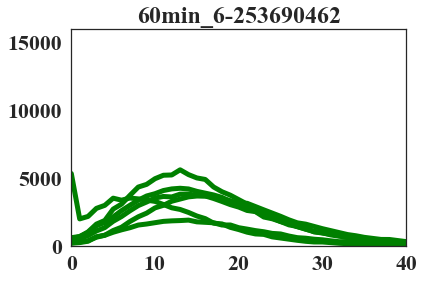

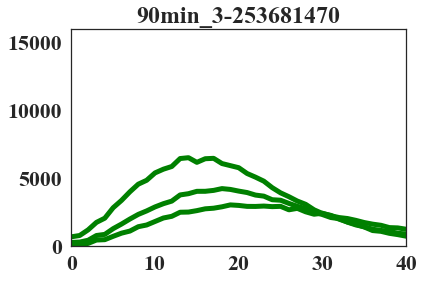

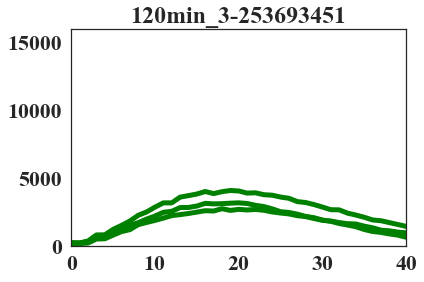

In [62]:
for time in ['30_sec', '1min', '2min', '3min', '4min', '5min', '10min', '20min', '30min', '45min',
             '60min', '90min', '120min']:
    conds = []
    for condition in conditions:
        if condition.startswith(time):
            conds.append(condition)

    fig, ax = plt.subplots()
            
    for cond in conds:
        sns.lineplot(x=range(len(lens_dict[cond])), y=lens_dict[cond], ax=ax, color='green')
        ax.set_xlim(0, 40)
        ax.set_ylim(0, 16000)
        ax.set_title(cond)

In [34]:
get_total_base_pcts(seqs_dict)

Processed all sequences




{'10min_2-253677475': {'A': 0.3566331439646097,
  'C': 0.1180779646453763,
  'G': 0.3702311817404445,
  'T': 0.1550577096495695},
 '10min_3-253686469': {'A': 0.3659248909802087,
  'C': 0.1148408480308733,
  'G': 0.3609439867545185,
  'T': 0.15829027423439948},
 '120min_1-253681468': {'A': 0.3140219313265727,
  'C': 0.12355020046639596,
  'G': 0.42035135783659366,
  'T': 0.14207651037043767},
 '120min_2-253678458': {'A': 0.3105752028809418,
  'C': 0.12527382632730275,
  'G': 0.42292748494978527,
  'T': 0.1412234858419702},
 '120min_3-253693451': {'A': 0.31668205716403314,
  'C': 0.12094514101690068,
  'G': 0.42042642922670553,
  'T': 0.14194637259236062},
 '1min_1-253686470': {'A': 0.32312629709664303,
  'C': 0.1284024048439205,
  'G': 0.37608635186888895,
  'T': 0.1723849461905475},
 '1min_2-253679455': {'A': 0.3453566497219158,
  'C': 0.1216242276510564,
  'G': 0.360339512124882,
  'T': 0.17267961050214573},
 '1min_3-253679456': {'A': 0.3614626386013159,
  'C': 0.11043070667018416,
  

In [64]:
[''.join(seq) for seq in seqs_dict['30_sec_1-253681469']]

['TGAAGCGATATGGGGGCGTCGTAGGAGGTGGAGAC',
 '',
 'TGGTGCAGAGGTAC',
 'GCGCAA',
 'ACGTGGAA',
 'GGAAT',
 'GGAT',
 'CA',
 'CAG',
 '',
 'ACATGGGGAGTGGCTGTGAGGTAAGGAGGTGTTAAAGTAC',
 'AGAGGGAAGGGGGAGTGGAGGATATTGGTGGGAAGCACGAGAGGA',
 'A',
 '',
 'GA',
 'GAAC',
 'GAGGGGGGAGGAAGTAG',
 'AGA',
 'GA',
 'AAT',
 'ACAGGGAGGAGGGCATGTGAAC',
 'AG',
 'GACC',
 'GA',
 'GG',
 'AGGGGGA',
 'AC',
 'AA',
 'AATA',
 'GTGCAAAA',
 'GA',
 '',
 'AGAGAAGA',
 'TA',
 'AGCAC',
 'TAG',
 '',
 'TAAA',
 'GAGATTTAGAGGAGGCGGTCCGAGGGAGGATCGAA',
 'TG',
 'AA',
 'AGTAC',
 'GAGTGGCTATAGGAGGAAC',
 'AA',
 'AG',
 'GAA',
 'G',
 'GGGA',
 'TAGGAT',
 'AA',
 'TTA',
 '',
 'TA',
 'GGACAATCCGTTCAA',
 '',
 'GAC',
 'A',
 'TAA',
 'TCCTGTGCAG',
 'TAAG',
 'AGGTATGAC',
 'CTA',
 'G',
 'TGTAG',
 'A',
 'GGACCATGACGACATGGTTCTACAGTGACTGCGGGAA',
 'TAG',
 'GAC',
 'GGGAGTTAC',
 '',
 'AGATGAG',
 'GATAC',
 '',
 'GTGTCGTGGTTCCGAG',
 'AATTGGAAT',
 'CCC',
 'GGA',
 'TCGTACGTGAA',
 'AA',
 'A',
 'AACAGGAAC',
 'GA',
 'TAGACAG',
 'TCGA',
 'TGGGTGGCCGGTGGAGAGCGGAT',
 'AGG